Oktober 2020
<img width=300 src="./fig/ladisk.png">

<center>Prof. dr. Janko Slavič</center>

# Fourierjeve vrste

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

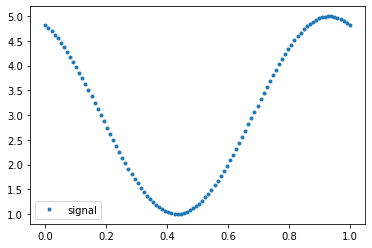

In [161]:
T = 1.#dolžina časovne vrste
N = 100#število točk
t, dt = np.linspace(0, T, N, retstep=True)
x = 2*np.sin(2*np.pi*t+2) +3
x2 = np.cos(2*np.pi*t*1)
plt.plot(t,x, '.', label='signal');
#plt.plot(t,x2, '.', label='cos fun n=1');
#plt.plot(t,x*x2, '.', label='podintegralska funkcija');
plt.legend();

In [162]:
x[0]

4.818594853651364

In [163]:
x[-1]

4.818594853651364

## Fourierjeve vrste

Teorija:

$
x(t)=\frac{a_0}{2}+\sum_{n=1}^{\infty}
\left[
a_n\cos\left(\frac{2\,\pi\,n\,t}{T_p} \right)
+
b_n\sin\left(\frac{2\,\pi\,n\,t}{T_p} \right)
\right]
$

$
a_0=\frac{2}{T_p}\int_0^{T_p}x(t)\,dt
$

$
a_n=\frac{2}{T_p}\int_0^{T_p}x(t)\,\cos\left(\frac{2\,\pi\,n\,t}{T_p}\right) \,dt
$

$
b_n=\frac{2}{T_p}\int_0^{T_p}x(t)\,\sin\left(\frac{2\,\pi\,n\,t}{T_p}\right) \,dt
$

In [175]:
def a0(x, t):
    dt = t[1]-t[0]
    Tp = t[-1]-t[0]
    return np.trapz(x,dx=dt)*2/Tp

def sub(x, t, n, fun):
    dt = t[1]-t[0]
    Tp = t[-1]-t[0]
    return np.trapz(x*fun(2*np.pi*n*t/Tp), dx=dt)*2/Tp

def an(x, t, n):
    return sub(x, t, n, np.cos)

def bn(x, t, n):
    return sub(x, t, n, np.sin)

def a(x, t, N):
    return [an(x, t, i+1) for i in range(N)]

def b(x, t, N):
    return [bn(x, t, i+1) for i in range(N)]

def rekonstr(x, t, N):
    _a0 = a0(x, t)
    _a  = a(x, t, N)
    _b  = b(x, t, N)
    Tp = t[-1]-t[0]
    out = _a0/2
    for i in range(N):
        out += _a[i]*np.cos(2*np.pi*(i+1)*t/Tp)+\
               _b[i]*np.sin(2*np.pi*(i+1)*t/Tp)
    return out

In [176]:
a(x, t, 5)

[1.8185948536513636,
 3.7470027081099033e-16,
 4.579669976578771e-16,
 5.551115123125783e-16,
 4.579669976578771e-16]

In [177]:
b(x, t, 5)

[-0.8322936730942849,
 -3.5561831257524545e-17,
 3.0357660829594124e-16,
 -8.465450562766819e-16,
 -5.117434254131581e-16]

In [178]:
xr=rekonstr(x, t, 20)

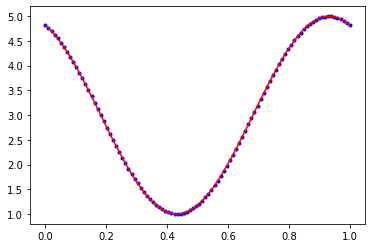

In [179]:
plt.plot(t, x, '.b');
plt.plot(t, xr, 'r');

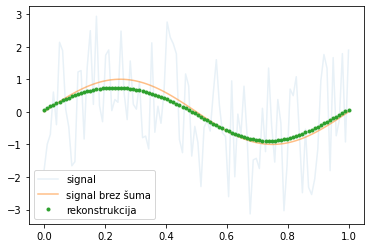

In [189]:
T  = 1.#dolžina časovne vrste
N  = 100#število točk
t  = np.linspace(0, T, N)
fi = 0#*2*np.pi*np.random.random()
xb = np.sin(2*np.pi*t+fi)
x  = xb+5.*(np.random.rand(N)-0.5)
xr = rekonstr(x, t, N=2)#spreminjaj število členov
plt.plot(t,x, alpha=0.1, label='signal');
plt.plot(t,xb, alpha=0.5, label='signal brez šuma');
plt.plot(t,xr, '.', label='rekonstrukcija');
plt.legend();

### Naraščajoča žaga

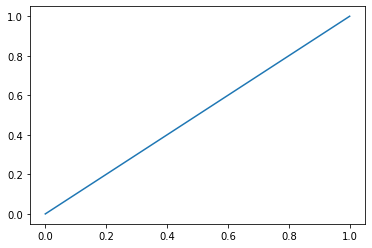

In [197]:
T = 1.
N = 1000
t = np.linspace(0, T, N)
x = t
plt.plot(t,x);

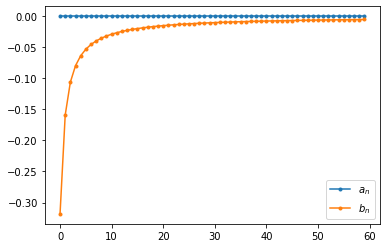

In [198]:
plt.plot(a(x, t, 60),'.-', label='$a_n$');
plt.plot(b(x, t, 60),'.-', label='$b_n$');
plt.legend(loc='lower right');

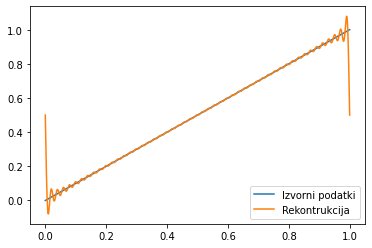

In [201]:
plt.plot(t, x, label='Izvorni podatki')
plt.plot(t,rekonstr(x, t, 50), label='Rekontrukcija')
plt.legend(loc='lower right');

## Kompleksne Fourierjeve vrste

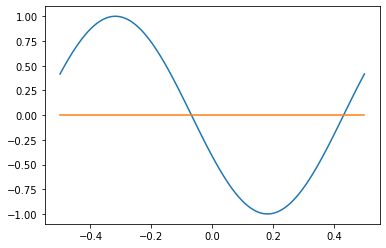

In [263]:
T = 1.#dolžina časovne vrste
N = 100#število točk
t = np.linspace(0, T, N)-T/2
φ = 2
x = 1*np.cos(2*np.pi*t + φ)# + 1j*np.sin(2*np.pi*t + φ)
plt.plot(t, np.real(x));
plt.plot(t, np.imag(x));

Teorija (Fourierjeva transformacija - Fourierjev integral):

$
x(t)=\sum_{n=-\infty}^{\infty}
c_n\,e^{j\,2\,\pi\,n\,t/T_p}
$

$
c_n=\frac{1}{T_p}\int_{-T_p/2}^{T_p/2}x(t)\,\,e^{-j\,2\,\pi\,n\,t/T_p} \,dt
$

In [264]:
def cn(x, t, n):
    dt = t[1]-t[0]
    Tp = t[-1]-t[0]
    return np.trapz(x*np.exp(-1j*2*np.pi*n*t/Tp), dx=dt)/Tp

def c(x, t, N):
    return [cn(x, t, i) for i in range(-N, N+1)]

def rekonstr_comp(x, t, N):
    _c = c(x, t, N)
    Tp = t[-1]-t[0]
    out = np.zeros(len(x), dtype='complex')
    for i in range(-N,N+1):
        out += _c[N+i]*np.exp(1j*2*np.pi*(i)*t/Tp)
    return out

In [265]:
rek = rekonstr_comp(x, t, N=3)

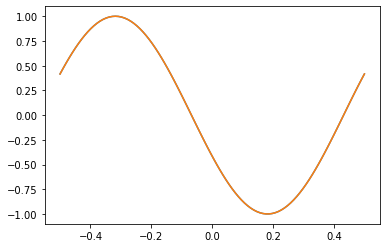

In [266]:
plt.plot(t, np.real(x))
plt.plot(t, np.real(rek))

In [267]:
cn(x, t, -1)

(-0.2080734182735714-0.4546487134128412j)

In [268]:
cn(x, t, 1)

(-0.2080734182735714+0.4546487134128412j)

In [269]:
2*np.abs(cn(x, t, 1))

1.0000000000000007

In [271]:
np.angle(cn(x, t, 1),deg=False)

2.0

In [272]:
xr=rekonstr_comp(x, t, 10)

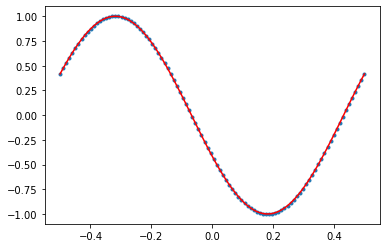

In [273]:
plt.plot(t, x, '.');
plt.plot(t, np.real(xr), 'r');

In [274]:
np.allclose(x, xr)

True

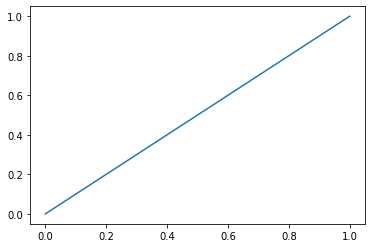

In [275]:
T = 1.
N = 100
t = np.linspace(0, T, N)
x = t
plt.plot(t, x);

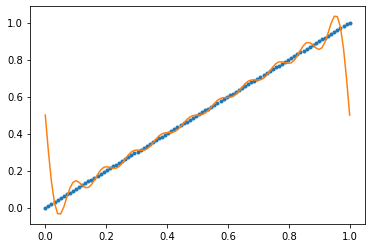

In [276]:
plt.plot(t, x, '.');
plt.plot(t, np.real(rekonstr_comp(x, t,10)));

## Amplitudni, fazni spekter

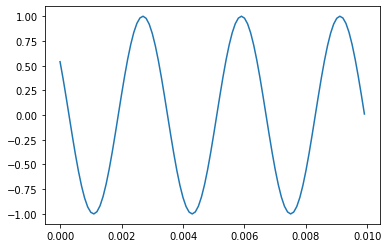

In [312]:
N = 10000
f = 312.
φ = 1#+0.*(np.pi*np.random.rand(N)-0.5)
T = 1.
t = np.linspace(0, T, N)
x = 1*np.cos(2*np.pi*f*t + φ) #+ .1*(np.random.rand(N)-0.5)
plt.plot(t[:100],x[:100]);

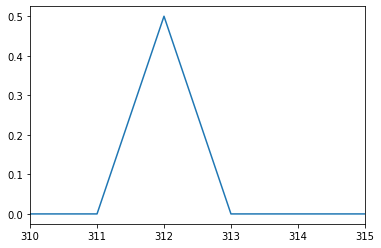

In [313]:
N = 500
plt.plot(np.arange(-N,N+1),np.abs(c(x, t, N)));
plt.xlim(310, 315);

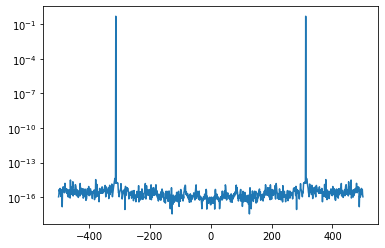

In [314]:
plt.semilogy(np.arange(-N,N+1),np.abs(c(x, t, N)));

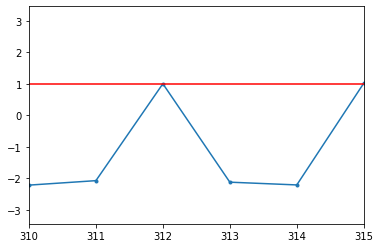

In [315]:
plt.plot(np.arange(-N,N+1),np.angle(c(x, t, N),deg=False), '.-');
plt.axhline(φ, color='r');
plt.xlim(310,315);

In [316]:
np.abs(cn(x, t, 312))

0.49999999999999994

In [317]:
φ

1

In [318]:
np.angle(cn(x, t, 312))

1.0

In [319]:
np.angle(cn(x, t, 313))

-2.123203086109099

### Pravokotna udarna motnja

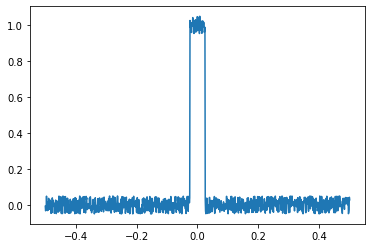

In [323]:
T = 1.
N = 1000
w = 0.05
t = np.linspace(0, T, N)-T/2
x = np.zeros(N)
x[t<=0.5*w*T] = 1.
x[t<-0.5*w*T] = 0.
x = x + 0.05*(np.random.rand(N)-0.5)*2
plt.plot(t, x);

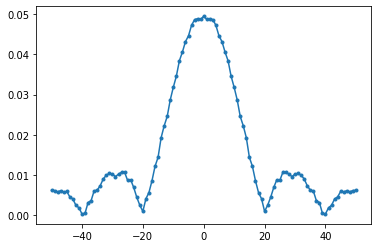

In [324]:
N = 50
plt.plot(np.arange(-N,N+1), np.abs(c(x,t,N)), '.-');

In [69]:
np.abs(c(x, t, 3))

array([0.04839568, 0.04960122, 0.04941637, 0.05030466, 0.04941637,
       0.04960122, 0.04839568])

### Polsinusna udarna motnja

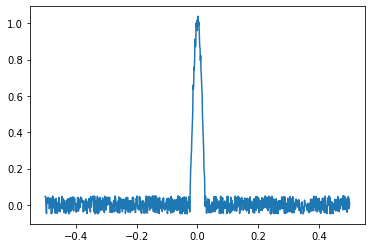

In [328]:
T = 1.
N = 1000
w = 0.05
t = np.linspace(0, T, N)-T/2
x = np.cos(2*np.pi*t/(w*2*T))
x[t> 0.5*w*T] = 0.
x[t<-0.5*w*T] = 0.
x = x + 0.05*(np.random.rand(N)-0.5)*2
plt.plot(t,x);

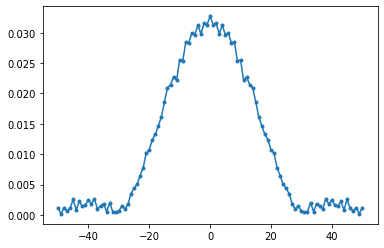

In [329]:
N = 50
plt.plot(np.arange(-N,N+1), np.abs(c(x,t,N)), '.-');